In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 895s 5us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(32, 32, 3)

In [7]:
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

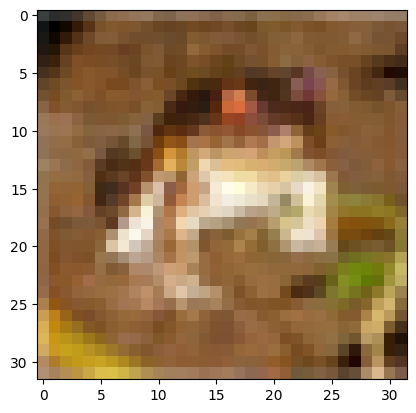

In [8]:
plt.imshow(single_image,cmap="Greys")

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [29]:
from tensorflow.keras.utils import to_categorical  

In [30]:
 x_test.shape

(10000, 32, 32, 3)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(50000, 10)

In [14]:
y_cat_test=to_categorical(y_test , num_classes=10)

In [15]:
y_cat_test.shape

(10000, 10)

In [16]:
y_cat_train = to_categorical(y_train,10)

In [19]:
single_image.max()

255

In [18]:
single_image.min()

0

In [20]:
x_train=x_train/255
x_test= x_test/255

In [24]:
x_train[0].max()




1.0

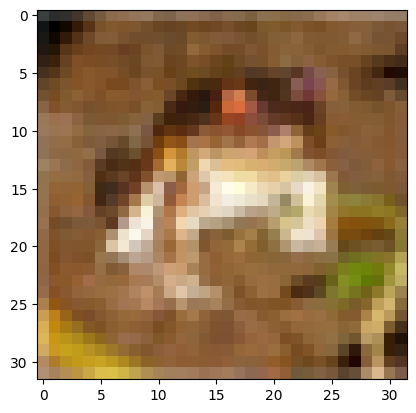

In [25]:
plt.imshow(x_train[0])

In [31]:
x_train=x_train.reshape(50000,32,32,3)
x_test=x_test.reshape(10000,32,32,3)

In [35]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [40]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [41]:
model.add(Conv2D(filters=32 ,kernel_size=(4,4),input_shape=(32,32,3),activation="relu" ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32 ,kernel_size=(4,4),input_shape=(32,32,3),activation="relu" ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))

# output softmax because multiclass classification
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor="val_loss",patience=2)

In [46]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3719 - loss: 1.7197 - val_accuracy: 0.5621 - val_loss: 1.2285
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5785 - loss: 1.1944 - val_accuracy: 0.5967 - val_loss: 1.1524
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6370 - loss: 1.0264 - val_accuracy: 0.6377 - val_loss: 1.0379
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6812 - loss: 0.9150 - val_accuracy: 0.6536 - val_loss: 1.0138
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7168 - loss: 0.8134 - val_accuracy: 0.6728 - val_loss: 0.9494
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7463 - loss: 0.7189 - val_accuracy: 0.6776 - val_loss: 0.9455
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7755 - loss: 0.6467 - val_accuracy: 0.6834 - val_loss: 0.9647
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7986 - loss: 0

In [47]:
metrics=pd.DataFrame(model.history.history)

In [54]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.45900,1.499504,0.5621,1.228536
1,0.59016,1.160226,0.5967,1.152410
2,0.64370,1.016500,0.6377,1.037931
3,0.68376,0.906161,0.6536,1.013787
4,0.71278,0.819897,0.6728,0.949447
5,0.74082,0.736460,0.6776,0.945528
6,0.76742,0.665760,0.6834,0.964715
7,0.78910,0.602220,0.6869,0.957767


<Axes: >

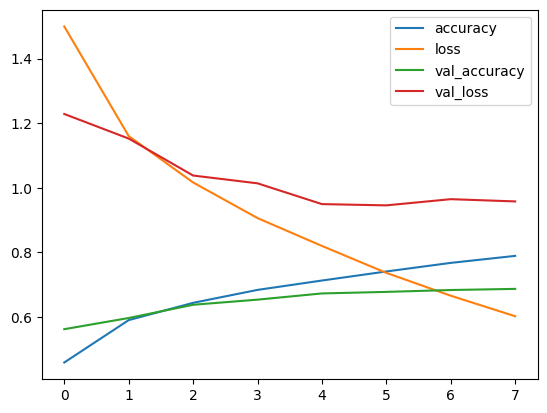

In [49]:
 metrics.plot()

<Axes: >

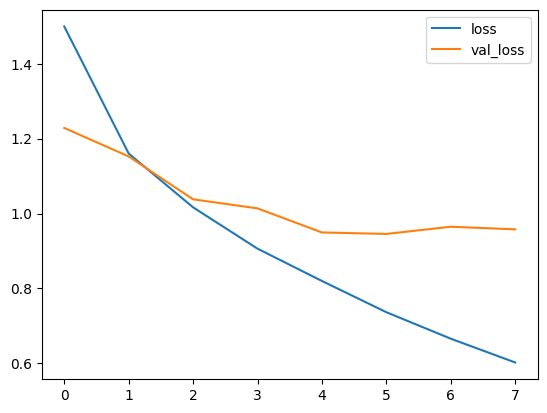

In [50]:
metrics[["loss","val_loss"]].plot()

<Axes: >

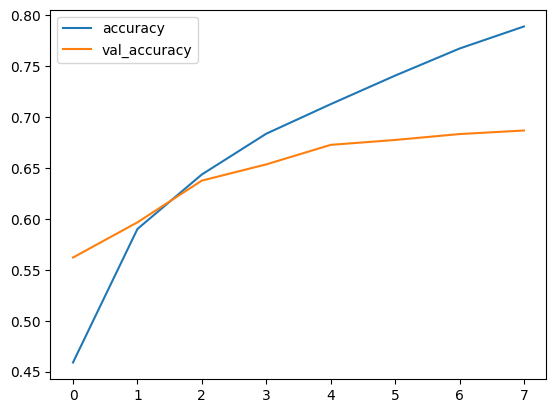

In [51]:
metrics[["accuracy","val_accuracy"]].plot()

In [55]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9577670097351074, 0.6869000196456909]

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
y_cat_test.shape

(10000, 10)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.argmax(model.predict(x_test), axis=-1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.6869

In [59]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [60]:
confusion_matrix(y_test,classes_x)

array([[646,  19,  97,  29,  33,   5,  11,  19, 100,  41],
       [ 23, 773,  13,  13,   7,   4,  16,   4,  42, 105],
       [ 36,   6, 559,  66, 107,  86,  71,  44,  15,  10],
       [ 19,   5,  57, 527,  78, 153,  66,  60,  15,  20],
       [ 22,   2,  69,  82, 636,  33,  45,  88,  18,   5],
       [ 12,   4,  49, 210,  42, 546,  35,  82,  13,   7],
       [  5,   6,  35,  66,  37,  22, 800,  15,   4,  10],
       [  9,   5,  20,  49,  61,  48,  10, 775,   7,  16],
       [ 48,  34,  21,  13,  10,   4,  11,   9, 821,  29],
       [ 31,  60,   9,  24,   7,   8,  11,  25,  39, 786]], dtype=int64)

In [61]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1000
           1       0.85      0.77      0.81      1000
           2       0.60      0.56      0.58      1000
           3       0.49      0.53      0.51      1000
           4       0.62      0.64      0.63      1000
           5       0.60      0.55      0.57      1000
           6       0.74      0.80      0.77      1000
           7       0.69      0.78      0.73      1000
           8       0.76      0.82      0.79      1000
           9       0.76      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [62]:
import seaborn as sns


<Axes: >

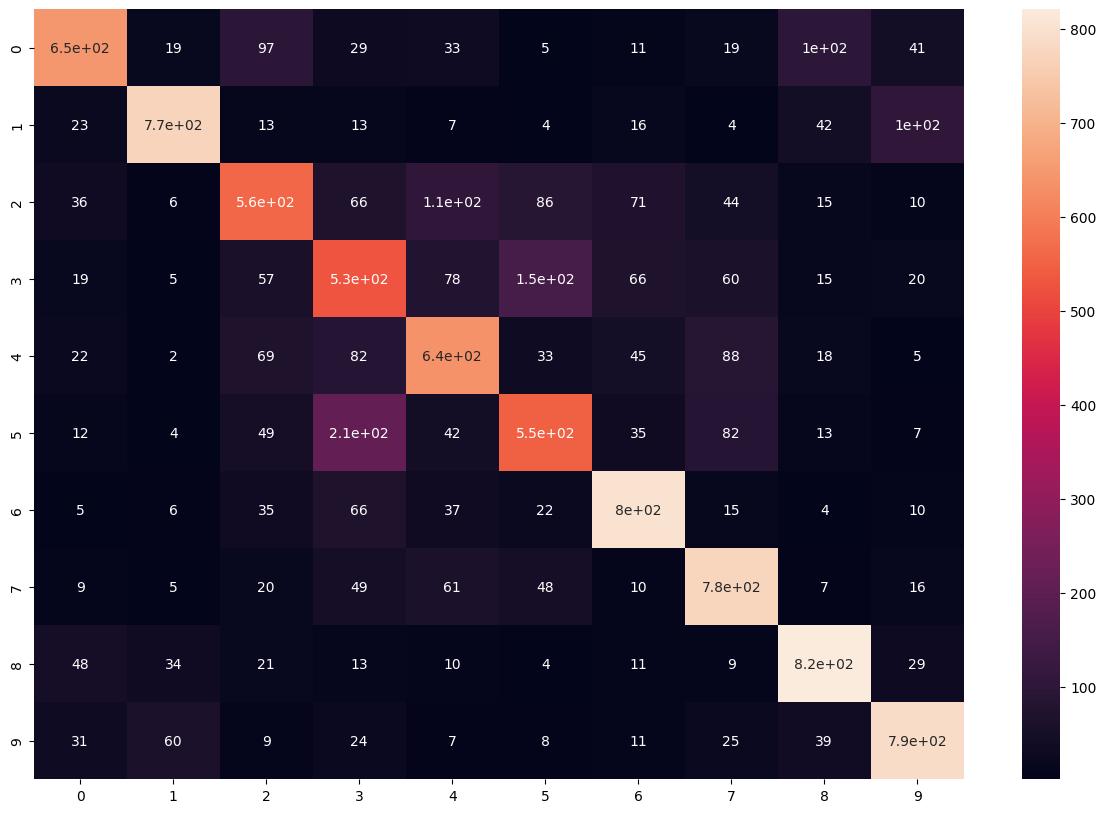

In [64]:
plt.figure(figsize=(15,10) )
sns.heatmap(confusion_matrix(y_test,classes_x) ,annot=True) 

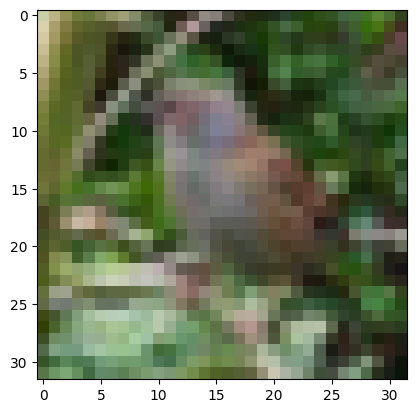

In [66]:
my_number=x_test[65]
my_number.reshape(32,32,3)
plt.imshow(my_number)

In [68]:
predict_x=model.predict(my_number.reshape(1,32,32,3)) 
classes_x=np.argmax(predict_x,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [69]:
classes_x

array([2], dtype=int64)